# Jax and Optimization

Two common optimization algorithms:
1. Gradient descent -- requires gradient of objective function
2. Newton's method  -- requires Hessian of objective function

Gradients can be computed in 3 ways:
1. Analytic derivation -- exact, but tedious to compute
2. Finite differences  -- easy to implement, not exact
3. Automatic differentiation -- exact, easy to implement


Jax is an automatic differentiation library in Python.

Documentation at [https://jax.readthedocs.io/en/latest/notebooks/quickstart.html](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html)

Can be installed on most laptops with

`pip install --upgrade "jax[cpu]"`

In [1]:
import numpy as np
import jax.numpy as jnp     # Jax provides a wrapper for NumPy 
from jax import grad, vmap  # automatic differentiation
from matplotlib import pyplot as plt
from tqdm import tqdm

## Compute gradients

Use function `grad()`, which returns a callable

Example:
$$
    f(x) = \sin(x),\quad g(x) = \nabla f(x) = \cos(x)
$$

In [2]:
def f(x):
    return jnp.sin(x)

g = grad(f) # Callable

# Compute with finite differences at x
x = 1.

h = 1e-1
fd = (f(x + h) - f(x)) / h  # Finite difference approximation
gx = g(x)                   # Automatic differentiation

# Print relative error using the true derivative cos(x)
print("relative error : h = {:0.0e}".format(h))
print("---------------------------------")
print("Finite difference         : {:0.1f}%".format(100*np.abs((fd - np.cos(x))/np.cos(x))))
print("Automatic differentiation : {:0.1f}%".format(100*np.abs((gx - np.cos(x))/np.cos(x))))

relative error : h = 1e-01
---------------------------------
Finite difference         : 7.9%
Automatic differentiation : 0.0%


## Maximum likelihood estimation with gradient descent

Consider a basic linear regression model $Y_i = w_0 + w_1 x_i + \epsilon_i$ with $x_1,\ldots,x_n$ fixed and $\epsilon_i \sim N(0,w_2^2)$.  The negative log-likelihood function is

$$
\log L(w_0,w_1,w_2) = -\frac{n}{2}\log(2\pi) - n\log(w_2) - \frac{1}{2w_2^2} \sum_{i=1}^n (Y_i - w_0 - w_1 x_i)^2
$$

In [3]:
# Define the negative log-likelihood divided by n and ignoring the constant
def f(w, Y, x):
    n = len(x)
    return jnp.log(w[2]) + jnp.mean((Y - w[0] - w[1]*x)**2) / (2*w[2]**2)

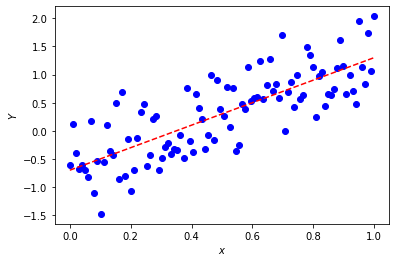

In [4]:
# Generate data x, Y
n = 100
w_star = np.array([-0.7, 2., 0.5])

x = np.linspace(0, 1, n)
Y = w_star[0] + w_star[1]*x + w_star[2]*np.random.randn(n)



# Plot data
plt.scatter(x, Y, marker='o', c='b')
plt.plot(x, w_star[0]+w_star[1]*x, c='r', ls='--')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$');

In [5]:
# Gradient descent
eps = 1e-2     # Step size
iters = 5000   # Number of iterations
w = np.array([0., 0., 1.])  # Initialization

# Compute the gradient using Jax
g = grad(f, argnums=0)

for i in tqdm(range(iters)):
    w -= eps*g(w, Y, x)

100%|██████████| 5000/5000 [01:20<00:00, 62.45it/s]


In [6]:
print("Final norm of gradient = {:0.2e}".format(np.linalg.norm(g(w, Y, x))))

Final norm of gradient = 6.67e-06


Estimated model
---------------
Y = -0.68 + 1.97x + e
e ~ N(0, 0.45^2)


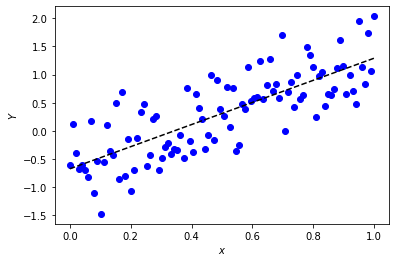

In [7]:
plt.scatter(x, Y, marker='o', c='b')
plt.plot(x, w[0]+w[1]*x, c='k', ls='--')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')

print('Estimated model')
print('---------------')
print('Y = {:0.2f} + {:0.2f}x + e'.format(w[0], w[1]))
print('e ~ N(0, {:0.2}^2)'.format(w[2]))